In [1]:
# libraries for data processing and analysis and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# libraries for ML modeling
import tensorflow as tf
import tensorflow_hub as hub  #repository of trained ML models

from tensorflow.keras import utils, layers, Sequential
from sklearn.metrics import confusion_matrix

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

2023-09-25 03:17:46.695159: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-25 03:17:47.047527: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-25 03:17:47.049581: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-25 03:17:48.392487: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import kaggle
# ignore the warnings if any, if you are running it on the personal computer

In [3]:
# define the constants
DATA_DIR = './data/'  # location to store the data (train, test and validation)
DATASET_NAME = 'gpiosenka/sports-classification' #  location of the kaggle dataset
SEED_VAL = 10  # for the reproducilibty
IMG_SIZE = (224, 224)  # (height, width)
BATCH_SIZE = 16

In [4]:
import os
if not os.path.exists(DATA_DIR):
    kaggle.api.dataset_download_files(DATASET_NAME, path=DATA_DIR, unzip=True)  # download the data

## Data loading and initial observations

In [5]:
tf.random.set_seed(SEED_VAL)
train = utils.image_dataset_from_directory(DATA_DIR+'train', batch_size=BATCH_SIZE, image_size=IMG_SIZE, seed=SEED_VAL)
test = utils.image_dataset_from_directory(DATA_DIR+'test', batch_size=BATCH_SIZE, image_size=IMG_SIZE, seed=SEED_VAL)
valid = utils.image_dataset_from_directory(DATA_DIR+'valid', batch_size=BATCH_SIZE, image_size=IMG_SIZE, seed=SEED_VAL)

Found 13492 files belonging to 100 classes.
Found 500 files belonging to 100 classes.
Found 500 files belonging to 100 classes.


2023-09-25 03:17:51.116702: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-25 03:17:51.117415: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [6]:
def plot_label_frequency(df, title=''):
    class_labels = df.class_names
    class_counts = [0] * len(class_labels)
    
    for _, batch_labels in df:
        for label in batch_labels.numpy():
            class_counts[label] += 1
    print(f"class labels' frequency distribution of {title} images:\n{class_counts}")
    plt.figure(figsize=(20, 5))
    plt.bar(class_labels, class_counts)
    plt.title(f"Class Distribution of {title} Images")
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()

class labels' frequency distribution of train images:
[112, 112, 132, 99, 113, 147, 123, 174, 169, 108, 110, 145, 140, 138, 120, 116, 149, 125, 164, 131, 120, 129, 134, 141, 123, 135, 157, 128, 151, 157, 134, 191, 190, 131, 118, 150, 157, 122, 121, 147, 158, 172, 134, 139, 102, 136, 108, 130, 112, 132, 136, 118, 150, 151, 128, 127, 132, 111, 189, 167, 131, 118, 112, 138, 157, 120, 157, 141, 163, 159, 143, 166, 144, 149, 130, 133, 130, 59, 148, 117, 147, 136, 122, 133, 142, 157, 141, 131, 135, 125, 128, 97, 156, 142, 103, 130, 134, 106, 119, 98]


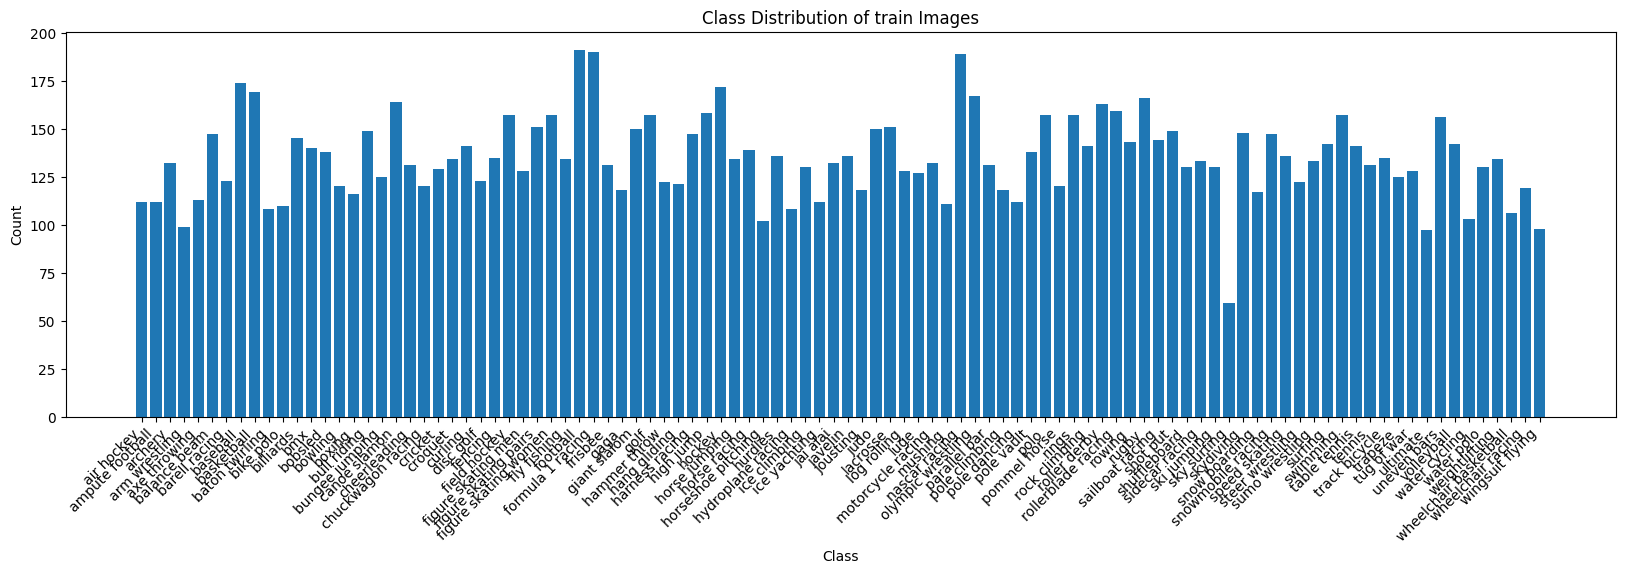

class labels' frequency distribution of test images:
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


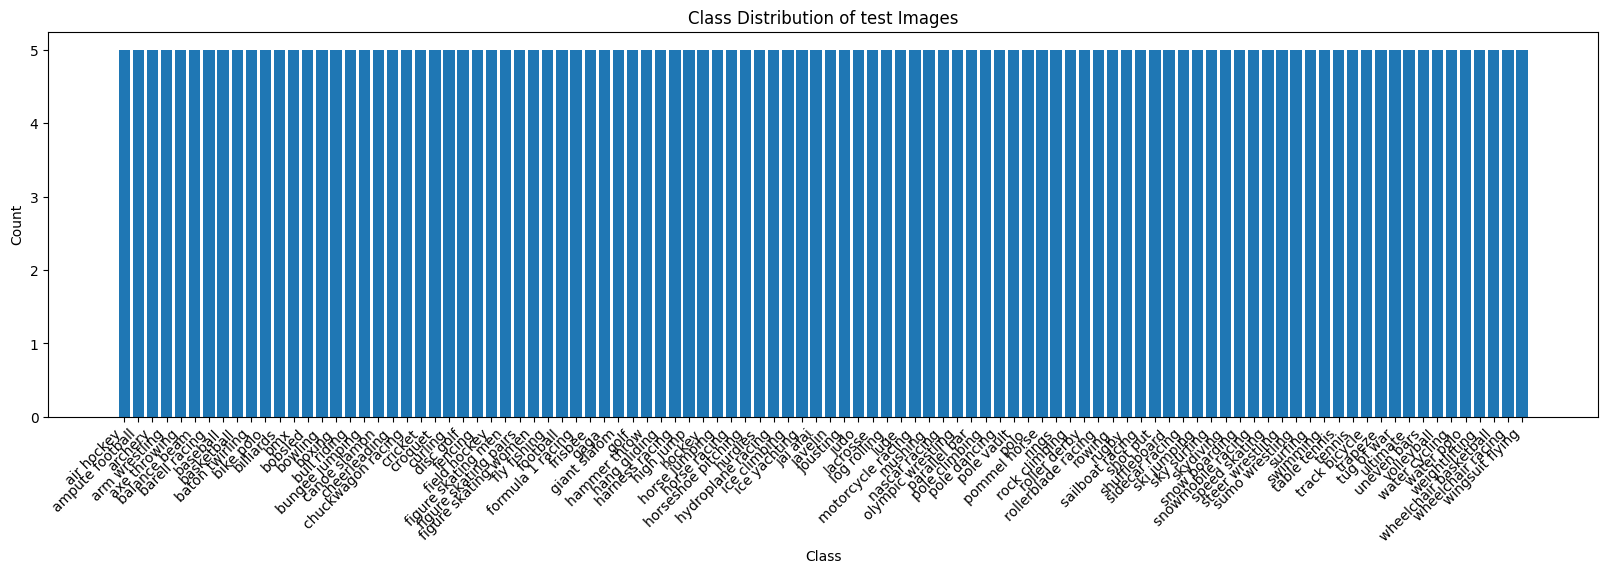

class labels' frequency distribution of validation images:
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


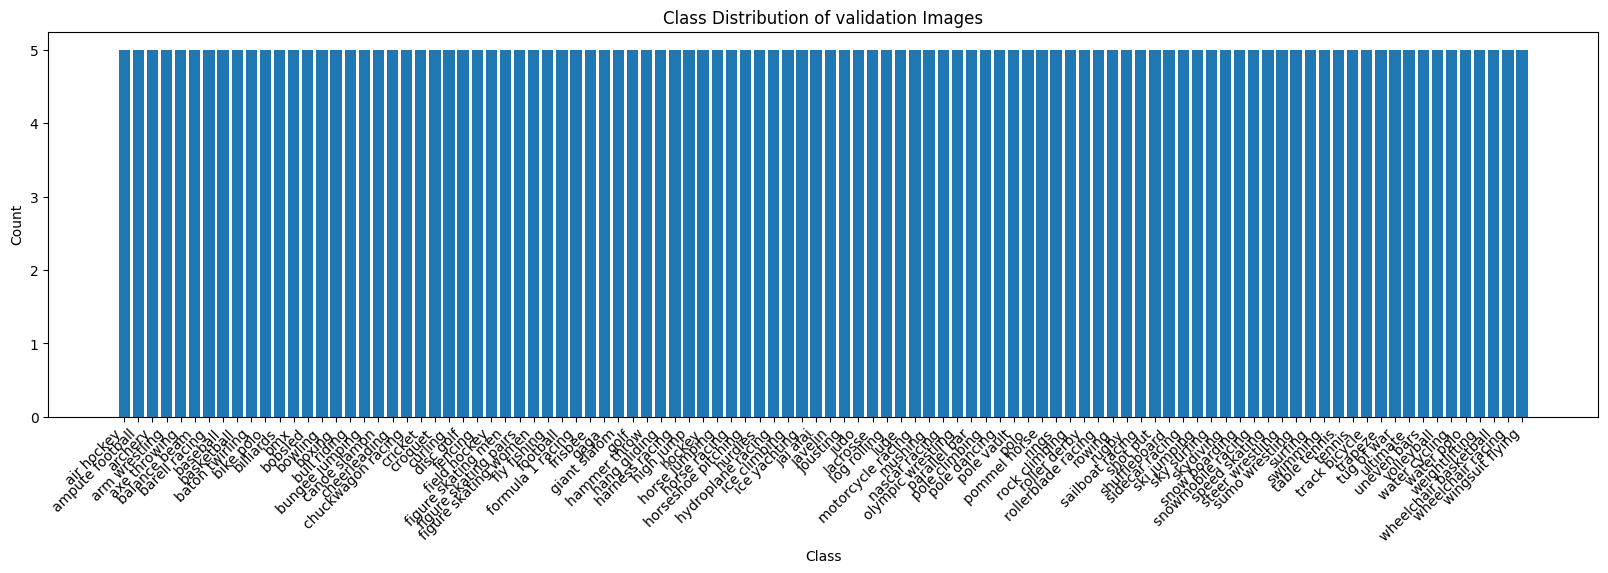

In [7]:
plot_label_frequency(train, title='train')
plot_label_frequency(test, title='test')
plot_label_frequency(valid, title='validation')

In [8]:
assert train.class_names == test.class_names == valid.class_names

**Observations**: 
- Training dataset has class imbalance but not the validation and testing dataset
- The class names across the three datasets is perfectly matching

In [9]:
def plot_sample_images(df):
    plt.figure(figsize=(12, 12))
    for batch_images, _ in df.take(1):
        for i in range(BATCH_SIZE):
            plt.subplot(4, BATCH_SIZE//4, i+1)
            plt.imshow(batch_images[i].numpy().astype("uint8"))

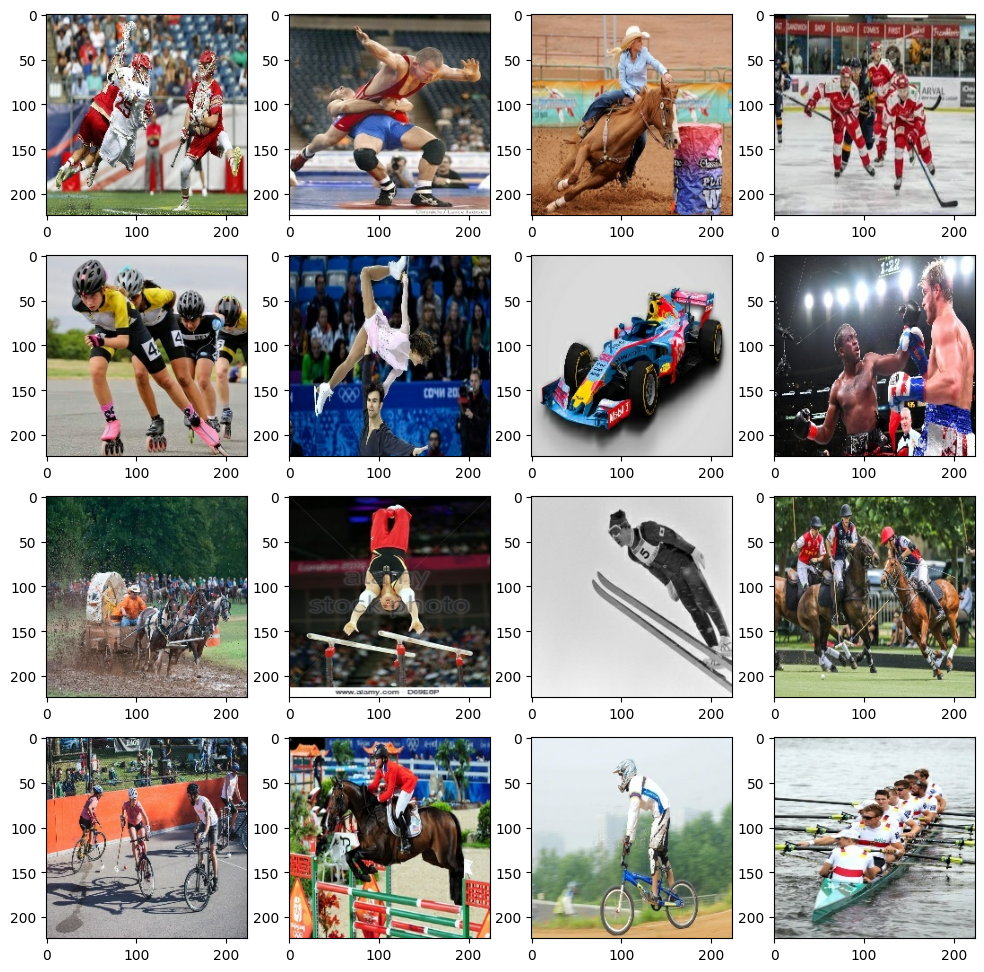

In [10]:
plot_sample_images(test)

## Model Building

## Predict using the best model

In [11]:
# define the custom metric function 'F1_score' to avoid the ValueError
def F1_score(y_true, y_pred):
    # define the F1 score calculation
    from sklearn.metrics import f1_score
    return f1_score(y_true, y_pred, average='micro')

In [12]:
# register the custom metric function
with tf.keras.utils.custom_object_scope({'F1_score': F1_score}):
    # load the pre-trained model
    model = tf.keras.models.load_model(DATA_DIR+'EfficientNetB0-100-(224 X 224)- 98.40.h5')

In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          0         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 stem_conv (Conv2D)          (None, 112, 112, 32)         864       ['normalization[0][0]']   

In [14]:
# iterate through the layers and print their configurations
for layer in model.layers:
    print(f"\nLayer Name: {layer.name}")
    print(layer.get_config())


Layer Name: input_1
{'batch_input_shape': (None, 224, 224, 3), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'input_1'}

Layer Name: rescaling
{'name': 'rescaling', 'trainable': True, 'dtype': 'float32', 'scale': 0.00392156862745098, 'offset': 0.0}

Layer Name: normalization
{'name': 'normalization', 'trainable': True, 'dtype': 'float32', 'axis': (3,), 'invert': False, 'mean': ListWrapper([0.485, 0.456, 0.406]), 'variance': ListWrapper([0.052441, 0.050176000000000005, 0.050625])}

Layer Name: stem_conv
{'name': 'stem_conv', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': (3, 3), 'strides': (2, 2), 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'VarianceScaling', 'config': {'scale': 2.0, 'mode': 'fan_out', 'distribution': 'truncated_normal', 'seed': None}, 'registered_name': None}, 'bias_initialize

In [15]:
def predict(df):
    predictions = []
    true_labels = []
    for images, labels in df:
        images = tf.keras.applications.efficientnet.preprocess_input(images) # preprocess the batch of images
        batch_predictions = model.predict(images) # Predict on the batch
    
        # apend batch predictions and true labels to lists
        predictions.extend(np.argmax(batch_predictions, axis=1)) # np.argmax converts softmax output to labels
        true_labels.extend(labels.numpy())
    return (true_labels, predictions)

In [17]:
y_true, y_pred = predict(test)
f1_score = F1_score(y_true, y_pred)
print(f"\nF1-score on the TEST dataset: {f1_score}\n\n")
print(f"\nF1-score on the VALIDATION dataset: {F1_score(*predict(valid))}\n\n")
print(f"\nF1-score on the TRAINING dataset: {F1_score(*predict(train))}\n\n")

1/1 [==============================] - 0s 135ms/step

F1-score on the TEST dataset: 0.98


1/1 [==============================] - 0s 150ms/step

F1-score on the VALIDATION dataset: 0.988


1/1 [==============================] - 0s 111ms/step

F1-score on the TRAINING dataset: 1.0




In [18]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)

    num_classes = cm.shape[0]  # number of classes
    
    plt.figure(figsize=(14, 14))
    sns.set(font_scale=0.6)  # adjust font size if needed
    # sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)  # use it for annotating the individual cells as well 
    sns.heatmap(cm)
    
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.xticks(np.arange(num_classes) + 0.5, range(num_classes), rotation=90)
    plt.yticks(np.arange(num_classes) + 0.5, range(num_classes))
    plt.show()

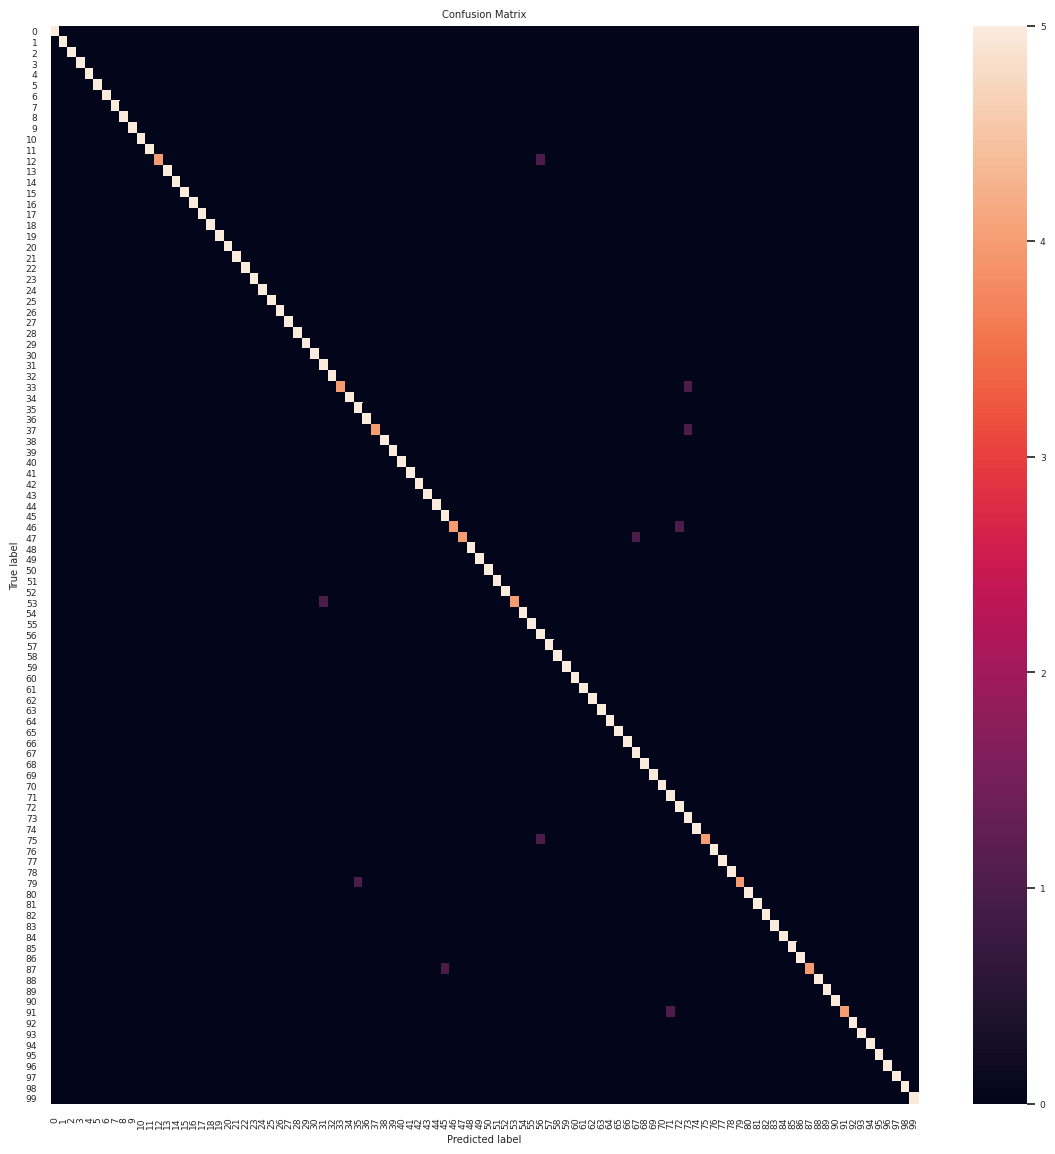

In [19]:
plot_confusion_matrix(y_true, y_pred)